# About Dataset

tvmarketing.csv (also called the TV Marketing dataset or Advertising dataset) is a small toy dataset used mainly to teach linear regression.It contains advertising spending on TV and the corresponding product sales.The idea is to see if more money spent on TV ads actually leads to higher sales. Let us see the few record of the dataset

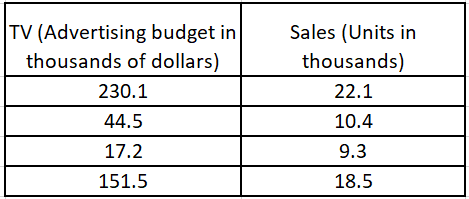


# Data Preprocessing

In [1]:
# Imports the pandas library and gives it the alias 'pd'
# (commonly used for data manipulation and analysis)
import pandas as pd

In [2]:
# Reads the CSV file into a pandas DataFrame named 'df'
df = pd.read_csv('/content/tvmarketing.csv')

# Displays the first 5 rows of the DataFrame for a quick look at the data
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# Displays a summary of the DataFrame including column names, data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
# Returns the dimensions of the DataFrame as a tuple (rows, columns)
df.shape

(200, 2)

In [5]:
# Generates descriptive statistics (count, mean, std, min, quartiles, max) for numerical columns in the DataFrame
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

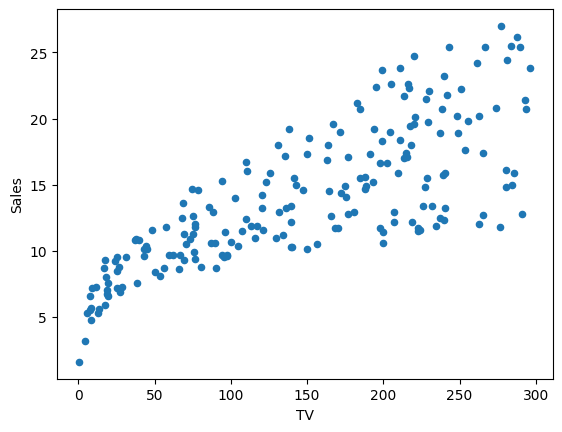

In [6]:
# Creates a scatter plot with 'TV' as the x-axis and 'Sales' as the y-axis to visualize their relationship
df.plot(x='TV', y='Sales', kind='scatter')

Equation of multiple linear regression<br>
$y = a + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $a$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case, it is simple linear regression and hence there will be only one feature variable

$y = a + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [7]:
# Selects the 'TV' column from the DataFrame and stores it in variable X (this will be a pandas Series)
X = df['TV']

# Displays the first 5 values of X to quickly check the data
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [8]:
# Selects the 'Sales' column from the DataFrame and stores it in variable y (this will be the target/output variable)
y = df['Sales']

# Displays the first 5 values of y to quickly check the target data
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [9]:
# Imports function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Splits features (X) and target (y) into train and test parts. 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [10]:
# Prints the data type of X_train (usually pandas Series since we selected a single column)
print(type(X_train))

<class 'pandas.core.series.Series'>


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160,)
(40,)
(160,)
(40,)


In [12]:
# It is a general convention in scikit-learn that observations are rows [2D], while features are columns[1D].
# This is needed only when you are using a single feature; in this case, 'TV' which is 1D. To convert into the 2D we need to use the Reshape.
# Reshape X_train and X_test from 1D arrays (Series) into 2D arrays (required by scikit-learn)
# (-1, 1) means:
#   -1 → automatically figure out the number of rows based on the data
#    1 → set number of columns to 1 (since we have only one feature: 'TV')
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [13]:
# Print the shapes of training and testing sets to verify the split and reshaping
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


# Model Fitting

In [14]:
# Import LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# Print the intercept and coefficients
print(f"Intercept (a): {reg.intercept_}")
print(f"Coefficient (m): {reg.coef_}")

Intercept (a): 7.118269529187898
Coefficient (m): [0.04650333]


$y = 7.118 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

# Prediction

In [16]:
# Use the trained model to predict the target values for the test dataset
y_pred = reg.predict(X_test)

In [17]:
# Getting the shape of y_test
y_pred.shape

(40,)

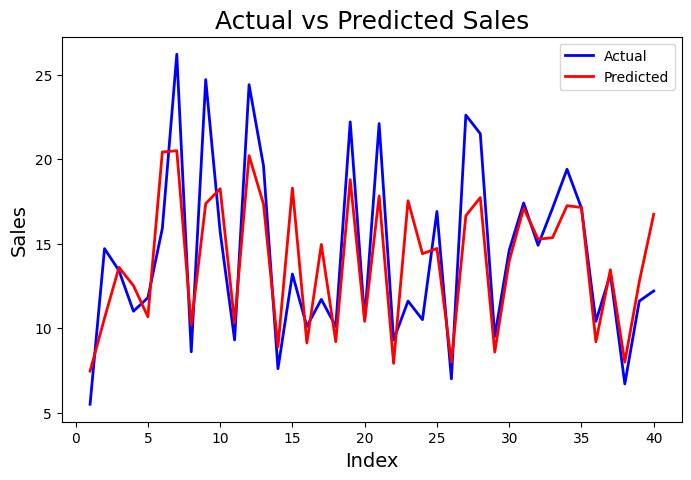

In [18]:
# Plotting Actual vs Predicted values for Sales
import matplotlib.pyplot as plt

# Create a sequence index (1 to length of test set) for plotting
indices = range(1, len(y_test) + 1)

# Set figure size for better visibility
plt.figure(figsize=(8,5))
plt.plot(indices, y_test, label="Actual",
         color="blue", linewidth=2)
plt.plot(indices, y_pred, label="Predicted",
         color="red", linewidth=2)

# Add title and axis labels
plt.title("Actual vs Predicted Sales", fontsize=18)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Sales", fontsize=14)

# Show legend for clarity
plt.legend()

plt.show()

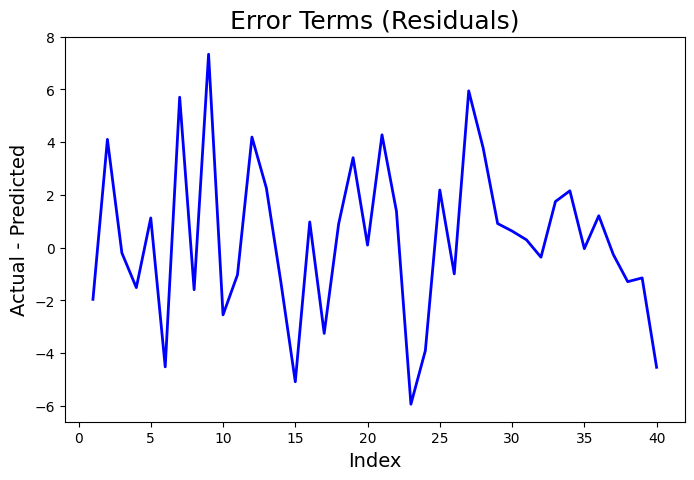

In [19]:
# Plotting Error Terms (difference between Actual and Predicted Sales)
import matplotlib.pyplot as plt

# Create a sequence index for plotting
indices = range(1, len(y_test) + 1)

# Set figure size
plt.figure(figsize=(8,5))
plt.plot(indices, y_test - y_pred, color="blue", linewidth=2)

# Add title and axis labels
plt.title("Error Terms (Residuals)", fontsize=18)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Actual - Predicted", fontsize=14)

plt.show()

In [20]:
# Predict the target/output value for a single data point where the feature value is 23
reg.predict([[23]])

array([8.18784607])

# Evaluation

In [21]:
# Import error metrics
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 9.395019220750086


In [22]:
# Calculate R-squared (coefficient of determination)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.6736251170665546
